# Responses in a model with and without interactive stratospheric chemistry
## Emma Axebrink
emma.axebrink@nuclear.lu.se

#### eScience Tools in Climate Science: Linking Observations with Modelling 

Assistant: Zhihong Zhuo <br>
zhihong.zhuo@geo.uio.no <br>
14 November 2022

# Abstract

Using models to investigate the effect a volcanic eruption can have on the atmosphere might be of great assistance. However, not all models are suited for this depending on what type of model is used. In this work two models, one with and one without interactive stratospheric chemistry, is to be investigated for the variable ozone consentration and additionally the variables AOD (Aerosol Optical Thickness) and temperature. The variables are also investigated for whether the response for a volcanic eruption is amplified at the polar regions.

# Introduction

Aerosol particles can have a large impact on the Earth's climate. For example, $SO_2$ from explosive volcanic eruptions can be injected into the stratosphere and later convert to aerosol particles which can have a lifetime of several years. These aerosols can affect the climate by scattering solar radiation, absorb longwave radiation and creating a surface for heterogeneous reactions to occur.([SPARC (2010)]) These heterogeneous chemical reactions work in the same way as water and nitric acid does in polar stratospheric coulds, i.e liberating chlorine to deplete ozone.
To further investigate the impact on the climate after a volcanic eruption, global Earth models can come into good use. However, to run a model can cost a lot of computational power and therefore it is not always desirable to include all calculations in a model. If the interest of a variable lies at the surface, a model without interactive stratospheric chemistry might be preferred since the computation is redused compared to a model with interactive stratospheric chemistry. A model wihout interactive stratospheric chemistry uses prescribed stratospheric variables as input, meaning that the model does not calculate these variables like the model with interactive stratospheric chemistry does ([G. Danabasoglu et al.(2020)]). The downside of using a reduced model might be that some variables are not responding as expected. This work aims to investigate this potential downside. More specifically; investigate the response to a volcanic eruption by looking at the ozone, AOD (Aerosol Optical Thickness) and temperature of two models. One with interactive stratospheric chemistry and one without. The model without interactive stratospheric chemistry is CESM2 CAM, hereafter referred to as CAM, and the model with interactive stratospheric chemistry is CESM2 WACCM hereafter referred to as WACCM. <br>
The expeced outcome for the three variables, ozone, AOD and temperature, is that the model withouth interactive chemistry (CAM) will have limited or no responce to volcanic eruptios since it does not calculate the reactions in the stratosphere. <br>

To get a better overview of the work the following research questions were stated: <br>

1. Does the response differ for ozone, AOD (Aerosol Optical Thickness) and temperature in models with and in models without interactive stratospheric chemistry?
2. Is the ozone, AOD (Aerosol Optical Thickness) and temperature response to volcanic eruptions amplified in the polar region?

Three latitudinal regions were looked at, the Arctic (lat > 60N), mid- and tropical region (60S > lat < 60N) and the Antarctic (lat < 60S). 


In this work the ozone is presented in dobson unit and is calculate from mol/mol with the following equations:

$Ozone \ concentration = O_3 \large[\frac{mol_{O_3}}{mol_{air}}\large]$ (1) <br>
$Molecular \ weight \ ozone = 48.0 \large[\frac{g}{mol_{O_3}}\large]$ (2) <br>
$Molecular \ weight \ air = 28.94 \large[\frac{g}{mol_{air}}\large]$ (3) <br>
$Pressure = Pa = \large[ \frac{F}{m^2}\large] = \large[ \frac{kg}{s^2 m}\large]$ (4) <br>
$g = 9.81 \large[ \frac{m}{s^2} \large]$ (5) <br>
$ 1 DU = 2.1415 \cdot 10^{-5} \large[ \frac{kg}{m^2} \large]$ (6) <br>

(1) with (2) and (3) yields: <br>
$Ozone = \frac{48.0}{28.94}$ (7) <br>

(7) with (4), (5) and (6) yields: <br>
$Ozone \ [DU] = Ozone \cdot \frac{Pa}{g} \cdot \frac{1}{DU}$ (8)

[SPARC (2010)]: https://www.atmosp.physics.utoronto.ca/SPARC/ccmval_final/PDFs_CCMVal%20June%2015/ch8.pdf
[G. Danabasoglu et al.(2020)]: https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019MS001916


# Method

## Packages used

In [70]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from dask.distributed import Client
import pprint
# My funcions
from eScienceCourse_2022_EmmaAxebrink_functions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Datasets 
**CMIP6 models**
CMIP6 is the sixth generation of the Coupeld Model Intercomparison Project, consisting of multiple models and a total of around one hundred runs.
In this report three historical runs of CAM and three historical runs of WACCM, six in total, have been chosen to investigate a model with and without interactive stratospheric chemistry. CAM does not have interactive stratospheric chemistry, i.e CAM utilise a prescribed stratosphere which is obtained by averaging three-member ensemble of historical WACCM runs ([G. Danabasoglu et al.(2020)]). 
The three runs for each model have the member id r1i1p1f1 ,r2i1p1f1 and r3i1p1f1. The variables investigated were o3, od550aer and ta, i.e. ozone, ambient aerosol optical thickness at 550nm and temperature. The time range for these two models are monthly averages from 1850 to 2014 but only one subsets of eleven years have been used, namely January 1986 to December 1996 which is five years prior and five years post the Mount Pinatubo eruption in 1991. 


[G. Danabasoglu et al.(2020)]: https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019MS001916

Since the datasets are large and take some time to load Dask is used to speed the process up by parallel computing

In [69]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 62.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43321,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 62.81 GiB
Comm: tcp://127.0.0.1:38015,Total threads: 4
Dashboard: http://127.0.0.1:41053/status,Memory: 15.70 GiB
Nanny: tcp://127.0.0.1:33727,


The data for both CAM and WACCM are located in the CMIP6 PANGEO catalogue. 

In [66]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
# Search the catalogue for ozone data 
waccm_o3 = col.search(source_id=['CESM2-WACCM'], experiment_id=['historical'], table_id=['Amon'], \
                      variable_id=['o3'], member_id=['r1i1p1f1','r2i1p1f1','r3i1p1f1'])
cam_o3 = col.search(source_id=['CESM2'], experiment_id=['historical'], table_id=['Amon'], 
                    variable_id=['o3'], member_id=['r1i1p1f1','r2i1p1f1','r3i1p1f1'])

# Search the catalogue for AOD data 
waccm_aod = col.search(source_id=['CESM2-WACCM'], experiment_id=['historical'], table_id=['AERmon'], \
                       variable_id=['od550aer'], member_id=['r1i1p1f1','r2i1p1f1','r3i1p1f1'])
cam_aod = col.search(source_id=['CESM2'], experiment_id=['historical'], table_id=['AERmon'], 
                     variable_id=['od550aer'], member_id=['r1i1p1f1','r2i1p1f1','r3i1p1f1'])

#Search the catalogue for temperature data 
waccm_t = col.search(source_id=['CESM2-WACCM'], experiment_id=['historical'], table_id=['Amon'], \
                     variable_id=['ta'], member_id=['r1i1p1f1','r2i1p1f1','r3i1p1f1'])
cam_t = col.search(source_id=['CESM2'], experiment_id=['historical'], table_id=['Amon'], \
                   variable_id=['ta'], member_id=['r1i1p1f1','r2i1p1f1','r3i1p1f1'])

In [5]:
dict_waccm_o3 = waccm_o3.to_dataset_dict(zarr_kwargs={'use_cftime':True})
dict_cam_o3 = cam_o3.to_dataset_dict(zarr_kwargs={'use_cftime':True})

dict_waccm_aod = waccm_aod.to_dataset_dict(zarr_kwargs={'use_cftime':True})
dict_cam_aod = cam_aod.to_dataset_dict(zarr_kwargs={'use_cftime':True})

dict_waccm_t = waccm_t.to_dataset_dict(zarr_kwargs={'use_cftime':True})
dict_cam_t = cam_t.to_dataset_dict(zarr_kwargs={'use_cftime':True})



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [6]:
print(list(dict_waccm_o3.keys()))
print(list(dict_cam_o3.keys()))
waccm_o3 = dict_waccm_o3['CMIP.NCAR.CESM2-WACCM.historical.Amon.gn']
cam_o3 = dict_cam_o3['CMIP.NCAR.CESM2.historical.Amon.gn']

print(list(dict_waccm_aod.keys()))
print(list(dict_cam_aod.keys()))
waccm_aod = dict_waccm_aod['CMIP.NCAR.CESM2-WACCM.historical.AERmon.gn']
cam_aod = dict_cam_aod['CMIP.NCAR.CESM2.historical.AERmon.gn']

print(list(dict_waccm_t.keys()))
print(list(dict_cam_t.keys()))
waccm_t = dict_waccm_t['CMIP.NCAR.CESM2-WACCM.historical.Amon.gn']
cam_t = dict_cam_t['CMIP.NCAR.CESM2.historical.Amon.gn']

['CMIP.NCAR.CESM2-WACCM.historical.Amon.gn']
['CMIP.NCAR.CESM2.historical.Amon.gn']
['CMIP.NCAR.CESM2-WACCM.historical.AERmon.gn']
['CMIP.NCAR.CESM2.historical.AERmon.gn']
['CMIP.NCAR.CESM2-WACCM.historical.Amon.gn']
['CMIP.NCAR.CESM2.historical.Amon.gn']


For easier computation, merge the three datasets into one.

In [7]:
waccm = waccm_o3.merge(waccm_t,compat='override').merge(waccm_aod,compat='override')
cam = cam_o3.merge(cam_t,compat='override').merge(cam_aod,compat='override')

## Analysis method

To reuce the size of the datasets a specific time range is selected. In this work the eruption of Mount Pinatubo, January 1986 to December 1996 is selected. This time span will allow for calculations of the anomaly by taking the mean of 5 years prior the eruption, i.e the climatology, and substracting that from the remaining 6 years to remove any seasonal variations.

In [8]:
# Select the starting year 5 years prior to the eruption
start_pina = cftime.DatetimeNoLeap(1986,1,15)
end_pina = cftime.DatetimeNoLeap(1996,12,15)

# WACCM
waccm_1986_1996 = waccm.sel(time=slice(start_pina, end_pina))
# CAM
cam_1986_1996 = cam.sel(time=slice(start_pina, end_pina))

Before calculating the anomaly for the three variables the ozone variable need to be converted from mol/mol to dobson units (DU). This is done by using the function *calculate_total_ozone_p* located in the eScienceCourse_2022_EmmaAxebrink_functions.py file. This function will create a new variable called *totO3*.

In [9]:
waccm_1986_1996 = calculate_total_ozone_p(waccm_1986_1996)
cam_1986_1996 = calculate_total_ozone_p(cam_1986_1996)

In [10]:
# Calculate the yearly and monthly anomaly. The year 1991 is when the volcanic eruption occured. 
# Yearly
year_waccm_anom_1986_1996 = calc_yearly_anomaly(waccm_1986_1996,1991)
year_cam_anom_1986_1996 = calc_yearly_anomaly(cam_1986_1996,1991)

# Monthly
mon_waccm_anom_1986_1996 = calc_monthly_anomaly(waccm_1986_1996,1991)
mon_cam_anom_1986_1996 = calc_monthly_anomaly(cam_1986_1996,1991)

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/srv/conda

In [11]:
# Weight the variables in the three regions before plotting
# Yearly
# WACCM
yr_waccm_arc = computeWeightedMean(year_waccm_anom_1986_1996.where(year_waccm_anom_1986_1996['lat']>60.)).compute()
yr_waccm_mid = computeWeightedMean(year_waccm_anom_1986_1996.where((year_waccm_anom_1986_1996['lat']<60.) & \
                                                                   (year_waccm_anom_1986_1996['lat']>-60.))).compute()
yr_waccm_ant = computeWeightedMean(year_waccm_anom_1986_1996.where(year_waccm_anom_1986_1996['lat']<-60.)).compute()

# CAM
yr_cam_arc = computeWeightedMean(year_cam_anom_1986_1996.where(year_cam_anom_1986_1996['lat']>60.)).compute()
yr_cam_mid = computeWeightedMean(year_cam_anom_1986_1996.where((year_cam_anom_1986_1996['lat']<60.) & \
                                                               (year_cam_anom_1986_1996['lat']>-60.))).compute()
yr_cam_ant = computeWeightedMean(year_cam_anom_1986_1996.where(year_cam_anom_1986_1996['lat']<-60.)).compute()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,
/srv/conda/e

In [12]:
# Weight the calculated anomaly variables before plotting
# Monthly
# WACCM
mon_waccm_arc = computeWeightedMean(mon_waccm_anom_1986_1996.where(mon_waccm_anom_1986_1996['lat']>60.)).compute()
mon_waccm_mid = computeWeightedMean(mon_waccm_anom_1986_1996.where((mon_waccm_anom_1986_1996['lat']<60.) & \
                                                                   (mon_waccm_anom_1986_1996['lat']>-60.))).compute()
mon_waccm_ant = computeWeightedMean(mon_waccm_anom_1986_1996.where(mon_waccm_anom_1986_1996['lat']<-60.)).compute()

# CAM
mon_cam_arc = computeWeightedMean(mon_cam_anom_1986_1996.where(mon_cam_anom_1986_1996['lat']>60.)).compute()
mon_cam_mid = computeWeightedMean(mon_cam_anom_1986_1996.where((mon_cam_anom_1986_1996['lat']<60.) & \
                                                               (mon_cam_anom_1986_1996['lat']>-60.))).compute()
mon_cam_ant = computeWeightedMean(mon_cam_anom_1986_1996.where(mon_cam_anom_1986_1996['lat']<-60.)).compute()



/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered

In [19]:
# Weight the variables before plotting
# Monthly
# WACCM
mon_w_arc_abs = computeWeightedMean(waccm_1986_1996.where(waccm_1986_1996['lat']>60.)).compute()
mon_w_mid_abs = computeWeightedMean(waccm_1986_1996.where((waccm_1986_1996['lat']<60.) & (waccm_1986_1996['lat']>-60.))).compute()
mon_w_ant_abs = computeWeightedMean(waccm_1986_1996.where(waccm_1986_1996['lat']<-60.)).compute()

# CAM
mon_c_arc_abs = computeWeightedMean(cam_1986_1996.where(cam_1986_1996['lat']>60.)).compute()
mon_c_mid_abs = computeWeightedMean(cam_1986_1996.where((cam_1986_1996['lat']<60.) & (cam_1986_1996['lat']>-60.))).compute()
mon_c_ant_abs = computeWeightedMean(cam_1986_1996.where(cam_1986_1996['lat']<-60.)).compute()

# Results and discussion

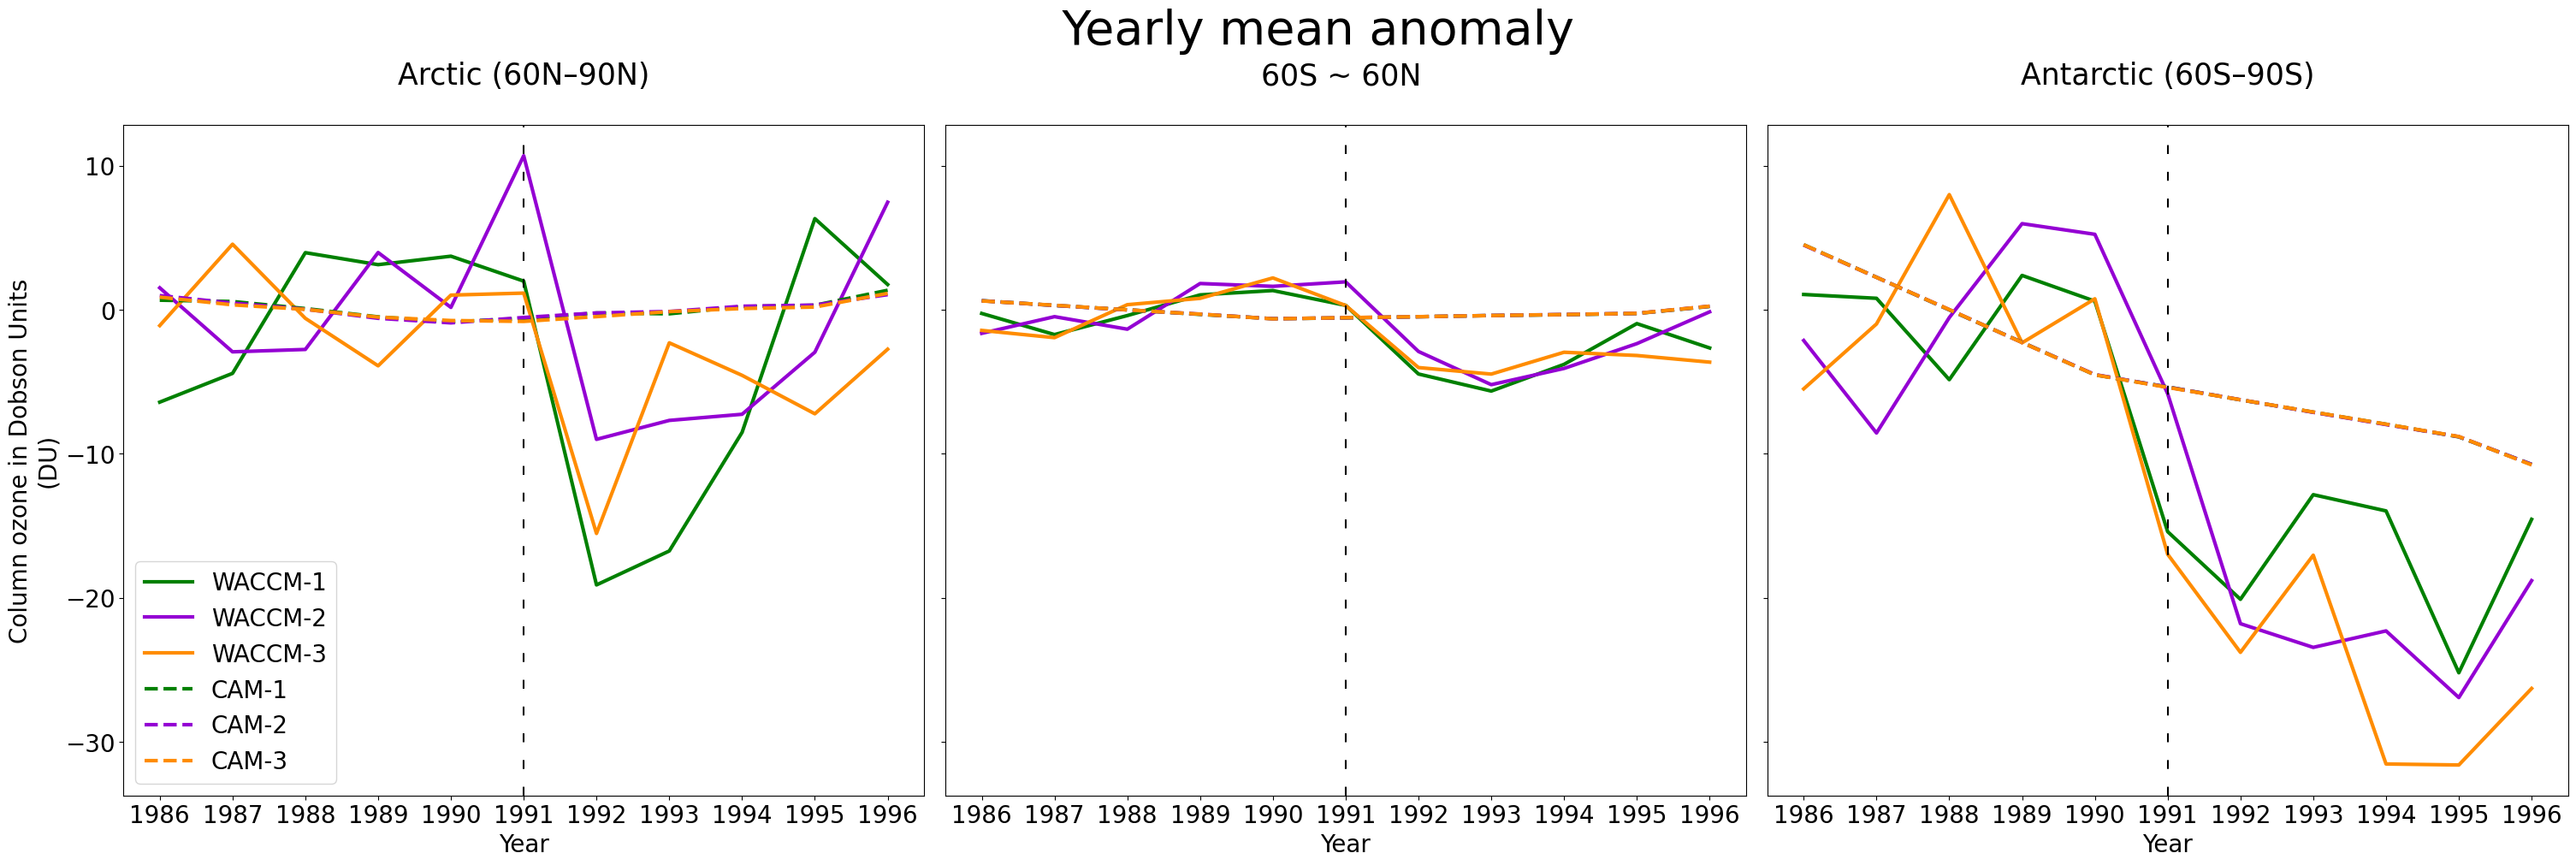

In [67]:
var = 'totO3'
plot3_year(yr_waccm_arc[var],yr_waccm_mid[var],yr_waccm_ant[var], yr_cam_arc[var],yr_cam_mid[var],yr_cam_ant[var],'anomaly')

**Figure 1** <br>
Yearly mean anomaly for column ozone over the years 1986 to 1996 in the Arctic (> 60N), mid- and tropical region (60S > lat < 60N) and the Antarctic (lat < 60S). The dashed black line represent the 1991 eruption of Mount Pinatubo. The solid colored lines represent the three WACCM runs and the dashed colored lines represent the three CAM runs. 

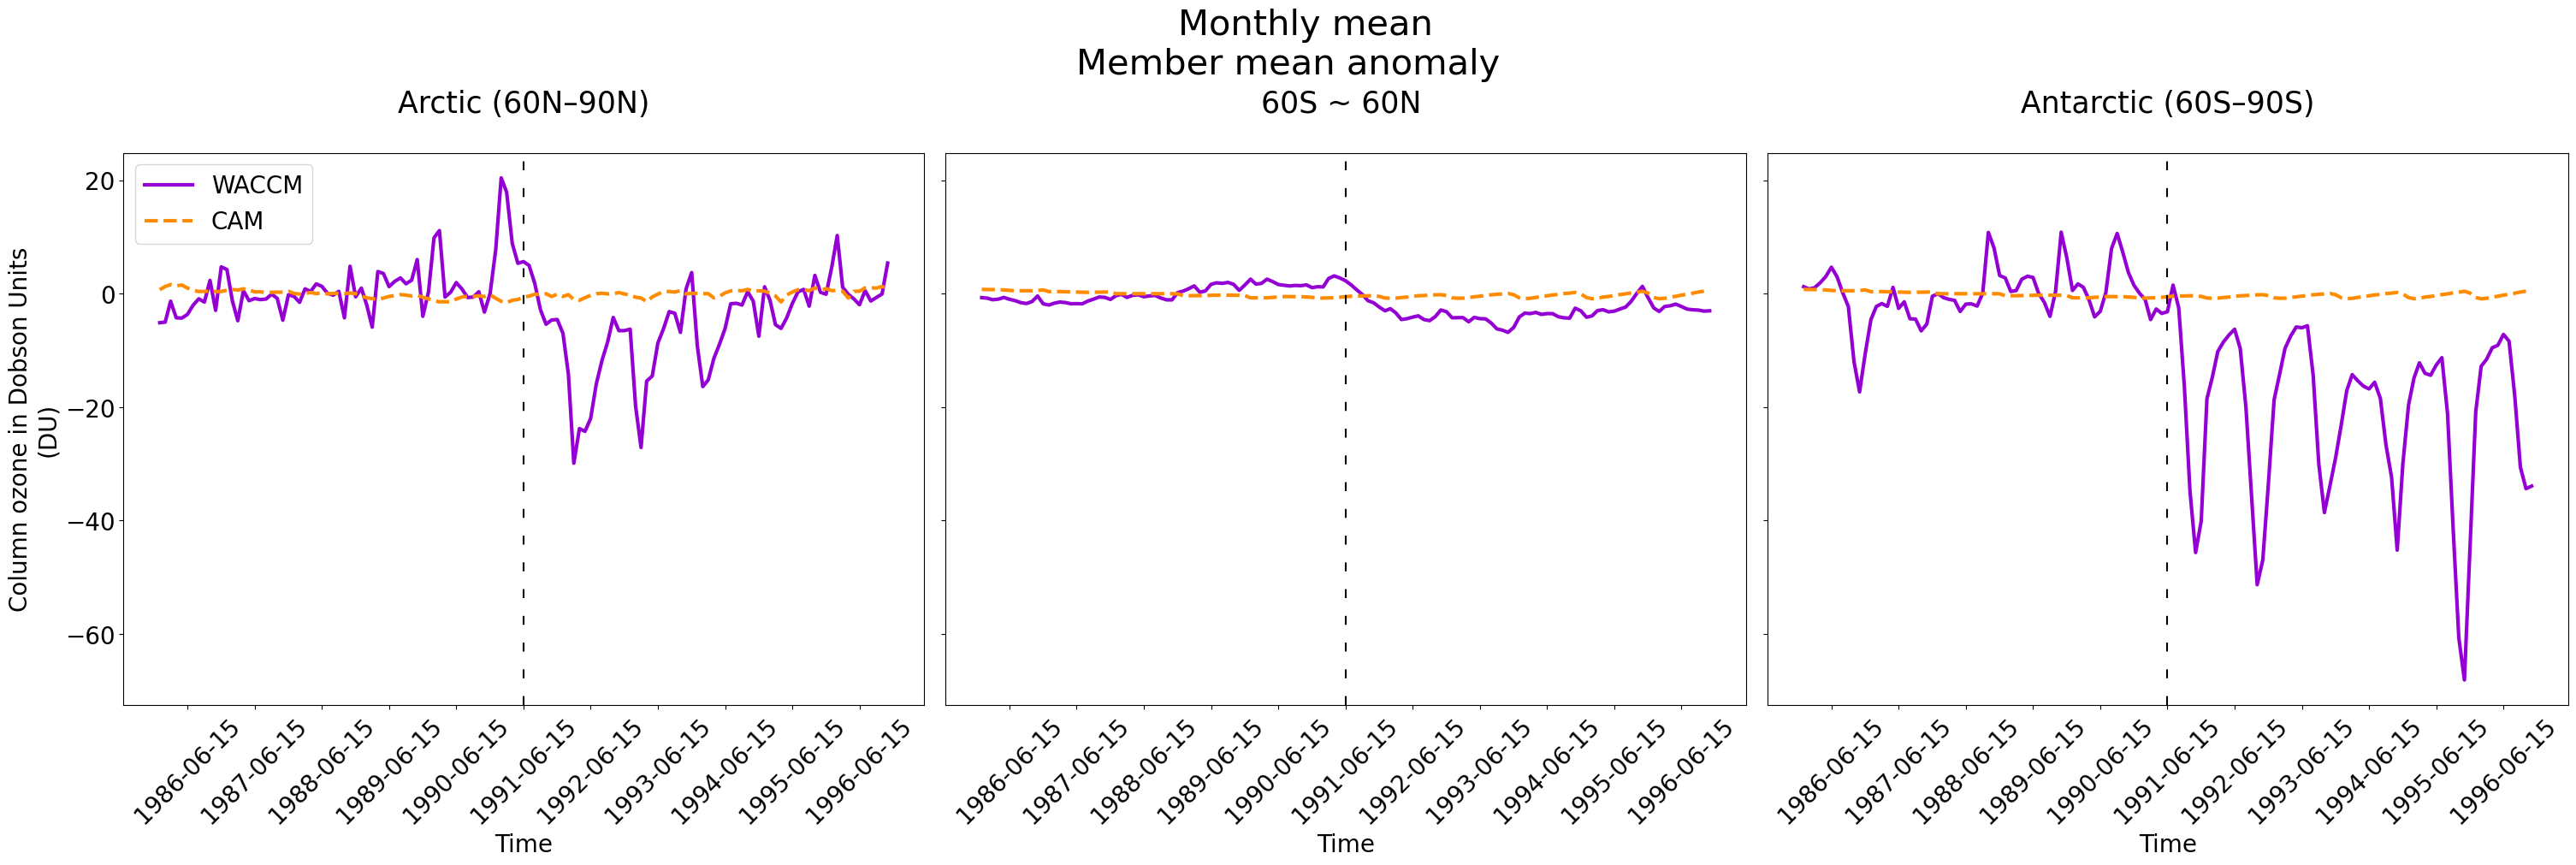

In [20]:
var = 'totO3'
w1 = mon_waccm_arc[var].mean('member_id',keep_attrs=True)
w2 = mon_waccm_mid[var].mean('member_id',keep_attrs=True)
w3 = mon_waccm_ant[var].mean('member_id',keep_attrs=True)
c1 = mon_cam_arc[var].mean('member_id',keep_attrs=True)
c2 = mon_cam_mid[var].mean('member_id',keep_attrs=True)
c3 = mon_cam_ant[var].mean('member_id',keep_attrs=True)

plot3_month_mean(w1,w2,w3,c1,c2,c3,'\nMember mean anomaly',1991)

**Figure 2** <br>
Monthly member mean anomaly for column ozone from January
1986 to December 1996 in the Arctic (> 60N), mid- and tropical region (60S > lat < 60N) and the Antarctic (lat < 60S). The dashed black line represents the eruption of Mount Pinatubo in 1991, June. The solid purple line represents the mean of the three WACCM runs and the dashed orange line represent the mean of the three CAM runs. 

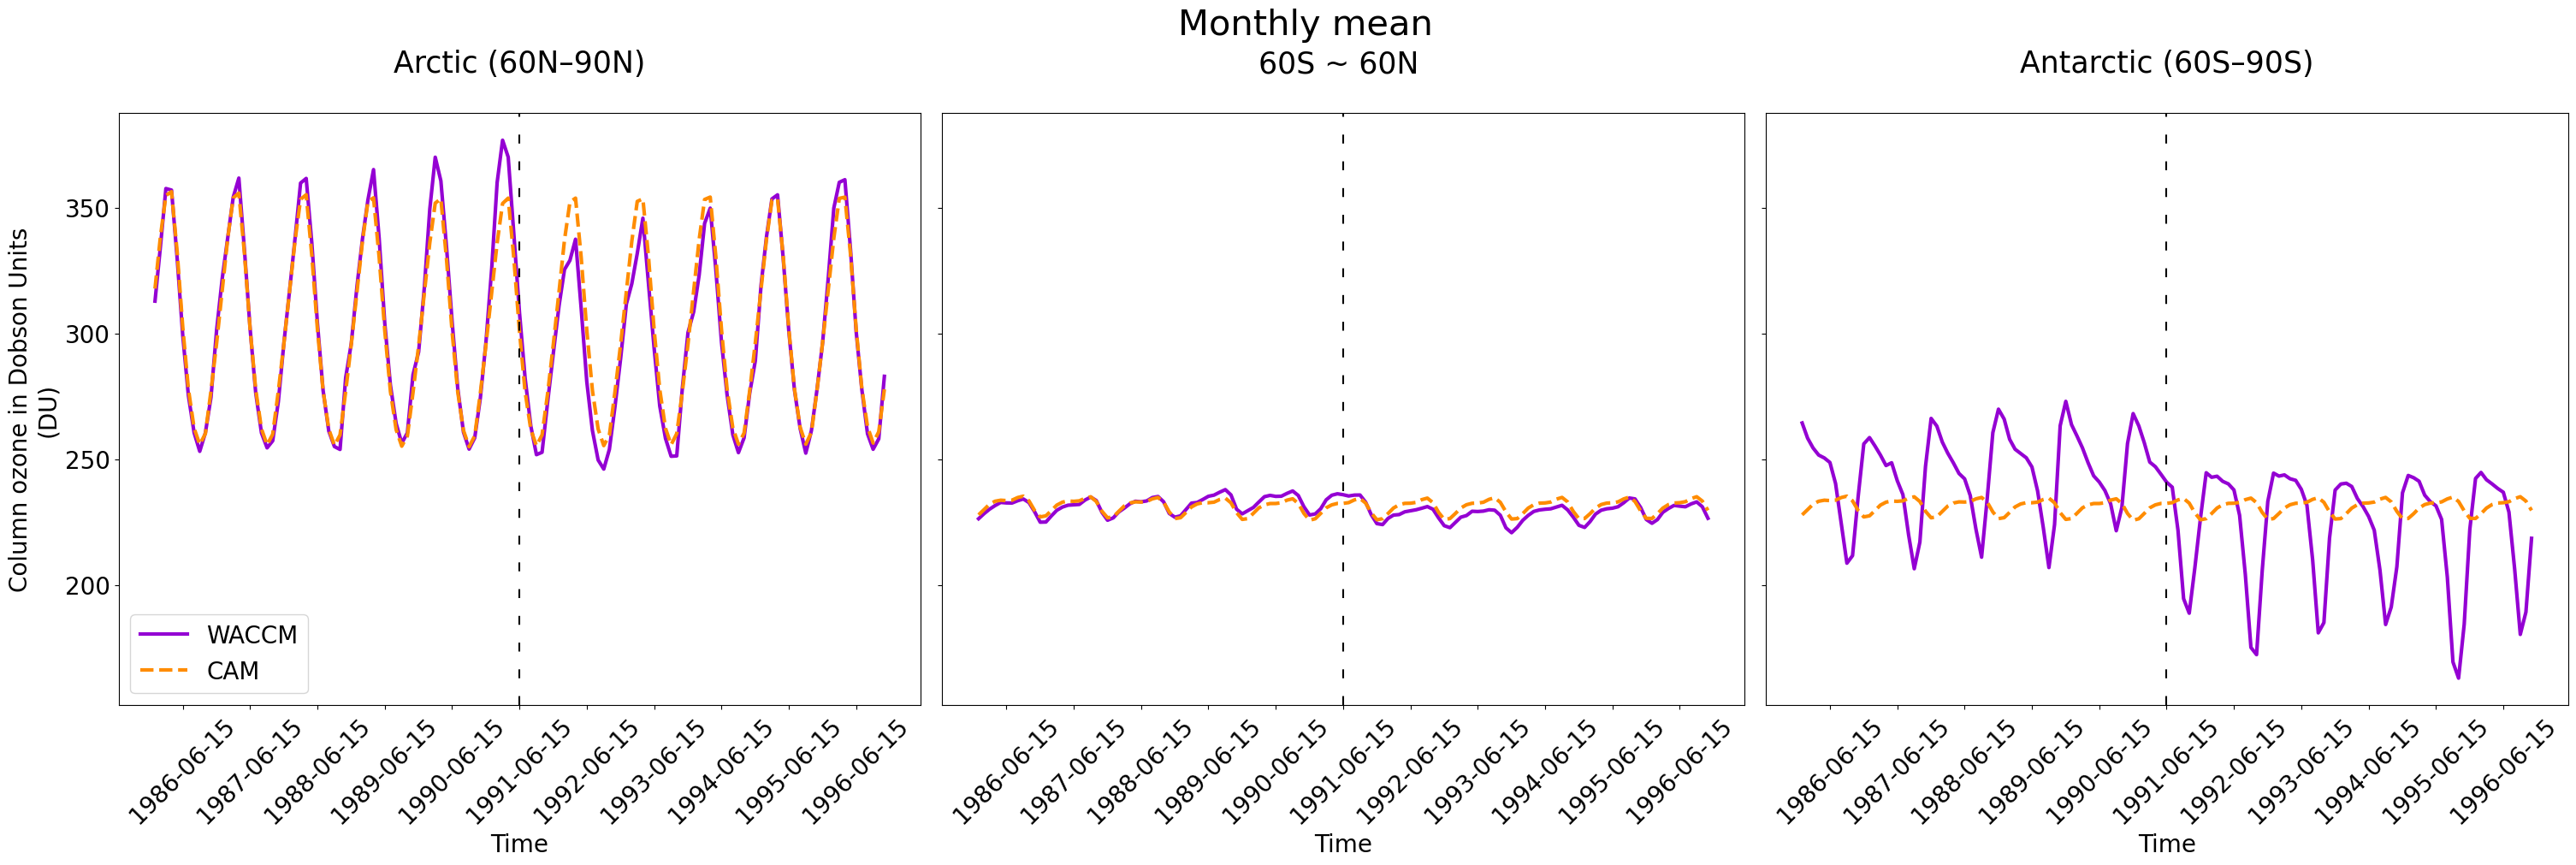

In [21]:
var = 'totO3'
w1 = mon_w_arc_abs[var].mean(['member_id'],keep_attrs=True)
w2 = mon_w_mid_abs[var].mean(['member_id'],keep_attrs=True)
w3 = mon_w_ant_abs[var].mean(['member_id'],keep_attrs=True)
c1 = mon_c_arc_abs[var].mean(['member_id'],keep_attrs=True)
c2 = mon_c_mid_abs[var].mean(['member_id'],keep_attrs=True)
c3 = mon_c_ant_abs[var].mean(['member_id'],keep_attrs=True)
plot3_month_mean(w1,w2,w3,c1,c2,c3,'',1991)

**Figure 3** <br>
Monthly member mean for column ozone from January 1986 to December 1996 in the Arctic (> 60N), mid- and tropical region (60S > lat < 60N) and the Antactic (lat < 60S). The dashed black line represent the eruption of Mount Pinatubo in 1991, June. The solid purple line represent the mean of the three WACCM runs and the dashed orange line represents the mean of the three CAM runs. 

After the eruption of Mount Pinatubo a decrease of ozone is expected due to the provided surface from the volcanic areosols for heterogeneous chemical reactions to occur. These reactions allows chlorine to break free from its reservoir species and destroy ozone.([SPARC (2010)]) This is visible in figure 1 for WACCM but not for CAM. We can also see that the column ozone in the southern polar region continue to decrease years after the eruption whereas in the northern polar region the column ozone seams to increase again after $\sim$ 5 years. The continuation of decreased ozone in the southern polar region is due to the ozone hole, created by emissions of CFC's ([S. S. Dhomse et al. (2019)]). The anomaly in the mid- and tropical (60S $\sim$ 60N) region is smaller compared to the Arctic and Antarctic region in figure 1, indicating that the depletion is greather at the poles. A reasoning for this is because that the majority of ozone is produced at the equator and then transported to the polar region in the respective winter season by the Brewer-Dobson circulation (BDC)([U. Langematz (2019)]), hence the largest anomaly for ozone depletion is in the polar regions. Another factor that would reduce the concentration of ozone at the poles is that the polar vortex, which can be described as a barrier preventing new air parcels to enter the polar regions, can become stronger after a volcanic eruption ([SPARC (2010)]). The polar vortex is however not explored in this work. <br>
Figure 2 shows similar results as figure 1 but as the mean over the three member runs of CAM and WACCM respectevly and insted of yearly mean we have monthly means. Both figure 1 and figure 2 show that CAM has a very small ozone responce after the vocanic eruption. This means that CAM does not consider the affect that volcanic eruption has on the ozone, such as volcanic areosls providing surface for heterogeneous chemical reactions, freeing chloring and then destroy ozone. <br>
The fluctuations in figure 2 for the Arctic and Antarctic can possibly be explained by the selection of years for the climatology, which is used to calculate the anomaly. The climatology is monthly averaged over five years prior to the eruption, which can be considered as a calm period. 
This time period might not have been optimal since the seasonal fluctuations from the CFC's ozone depleation is still visible to some extent. However the main investigation of comparing two models, with and without interactive stratospheric chemistry, is not affected by this.
In the Arctic the average column ozone is around 300 DU, according to figure 3, and togeather with figure 2 we can see the decrease of column ozone by $\sim$ 30 DU a year after the eruption. A column ozone value of 220DU is considered a hole according to [U. Langematz (2019)], which means that the column ozone in Antarctica in figure 3 might not be accurate, this is not explored in this work. However the decrease of ozone after a volcaic eruption of 30 DU could mean the difference of a ozone hole or not. 



[SPARC (2010)]: https://www.atmosp.physics.utoronto.ca/SPARC/ccmval_final/PDFs_CCMVal%20June%2015/ch8.pdf
[S. S. Dhomse et al. (2019)]:https://www.nature.com/articles/s41467-019-13717-x
[U. Langematz (2019)]:https://link.antinger.com/article/10.1007/s40828-019-0082-7#citeas

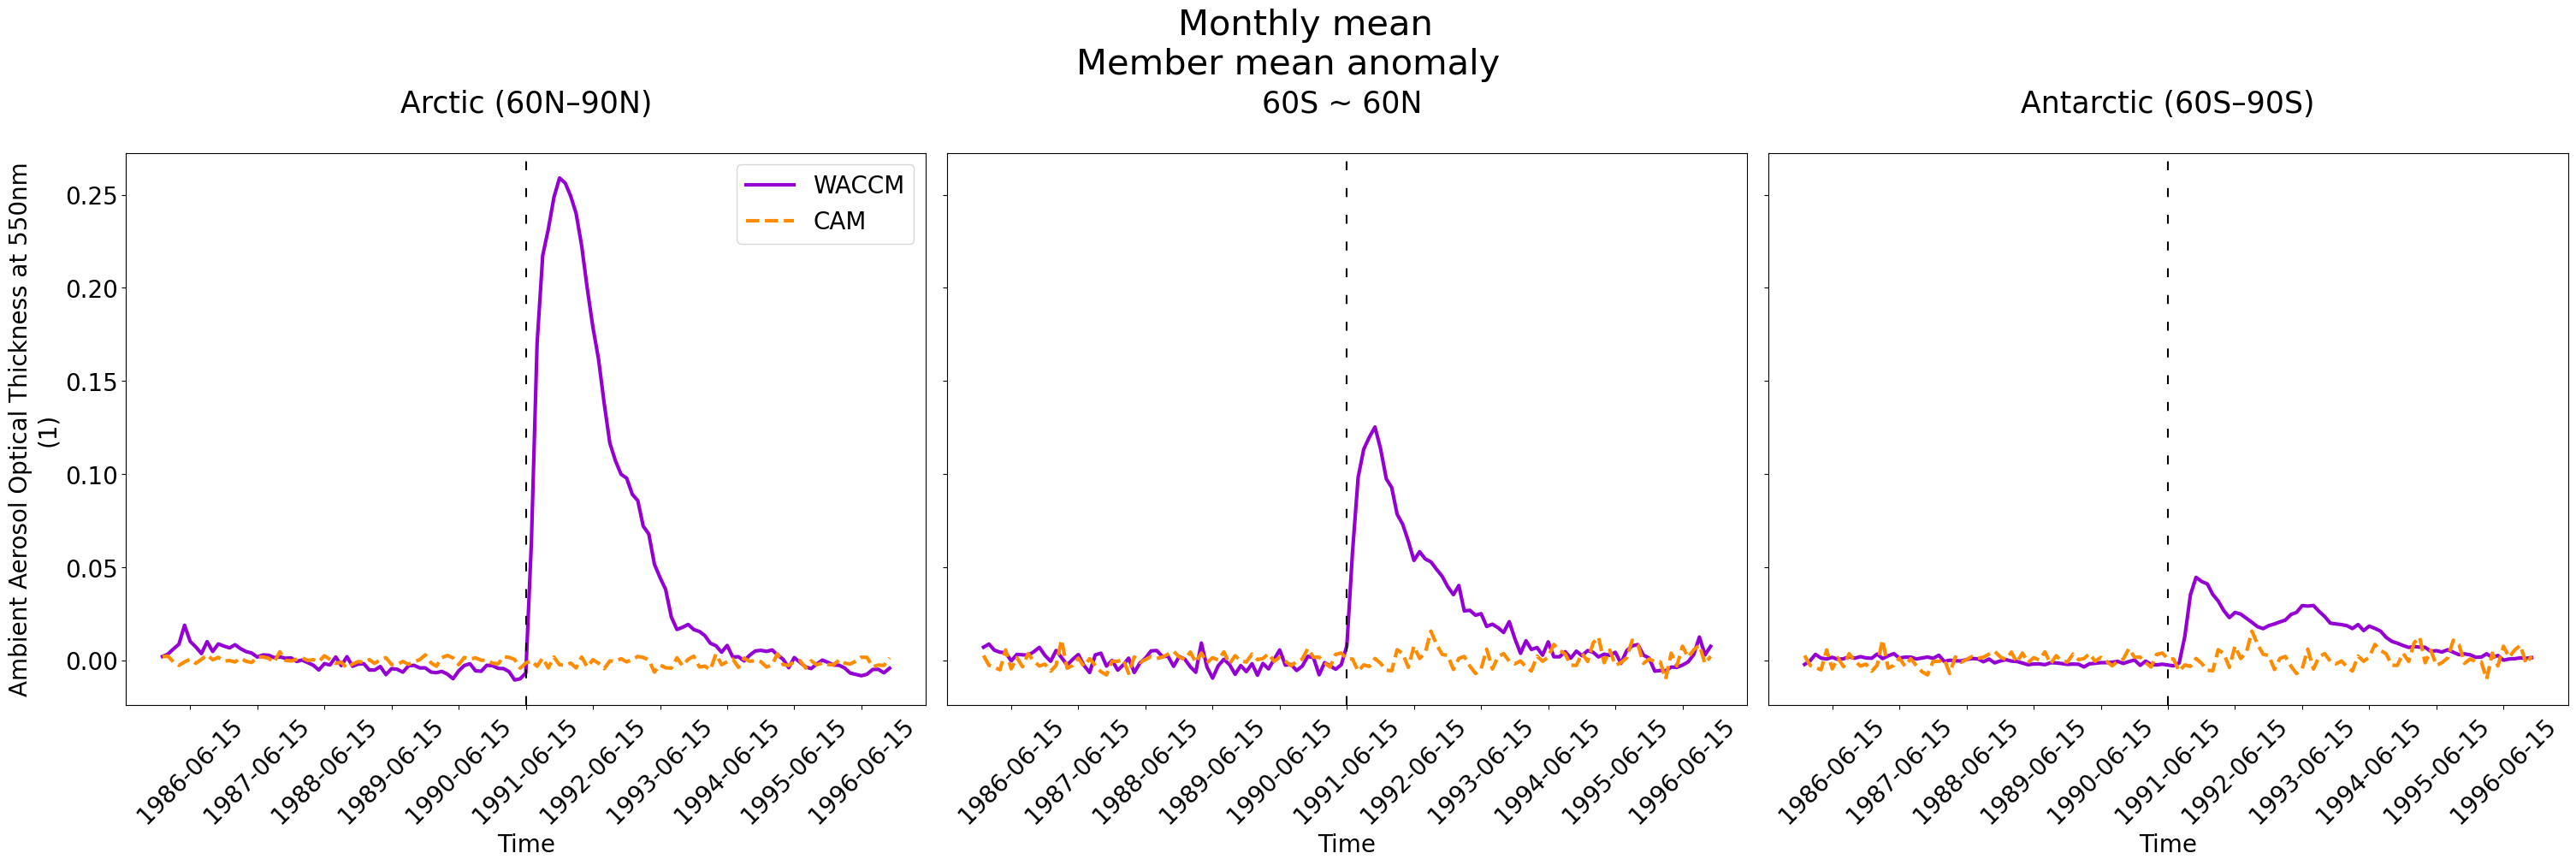

In [16]:
var = 'od550aer'
w1 = mon_waccm_arc[var].mean('member_id',keep_attrs=True)
w2 = mon_waccm_mid[var].mean('member_id',keep_attrs=True)
w3 = mon_waccm_ant[var].mean('member_id',keep_attrs=True)
c1 = mon_cam_arc[var].mean('member_id',keep_attrs=True)
c2 = mon_cam_mid[var].mean('member_id',keep_attrs=True)
c3 = mon_cam_ant[var].mean('member_id',keep_attrs=True)

plot3_month_mean(w1,w2,w3,c1,c2,c3,'\nMember mean anomaly',1991)

**Figure 4** <br>
Monthly member mean anomaly for AOD (Aerosol Optical Thickness) from January 1986 to December 1996 in the Arctic (> 60N), mid- and tropical region (60S > lat < 60N) and the Antarctic (lat < 60S). The dashed black line represents the eruption of Mount Pinatubo in 1991, June. The solid purple line represent the mean of the three WACCM runs and the dashed orange line represent the mean of the three CAM runs.

Figure 4 clearly shows increase of the AOD after the Mount Pinatubo eruption in June 1991 in WACCM but not in CAM. We can also see, for WACCM, a stronger AOD signal in the Arctic compared to the mid- and tropical region (60S > lat < 60N) and the Antactic (lat < 60S). This could potentially be explained by the location of the volcanoe, $15^{\circ}08′N$, $120^{\circ}21′E$ in western Luzon, Philippines, but a more likely cause is the direction of winds simulated in the WACCM model, not exlopred in this work. The lack of responce in CAM is due to CAM not having interactive stratospheric chemistry but insted uses mean values from WACCM runs as input. 



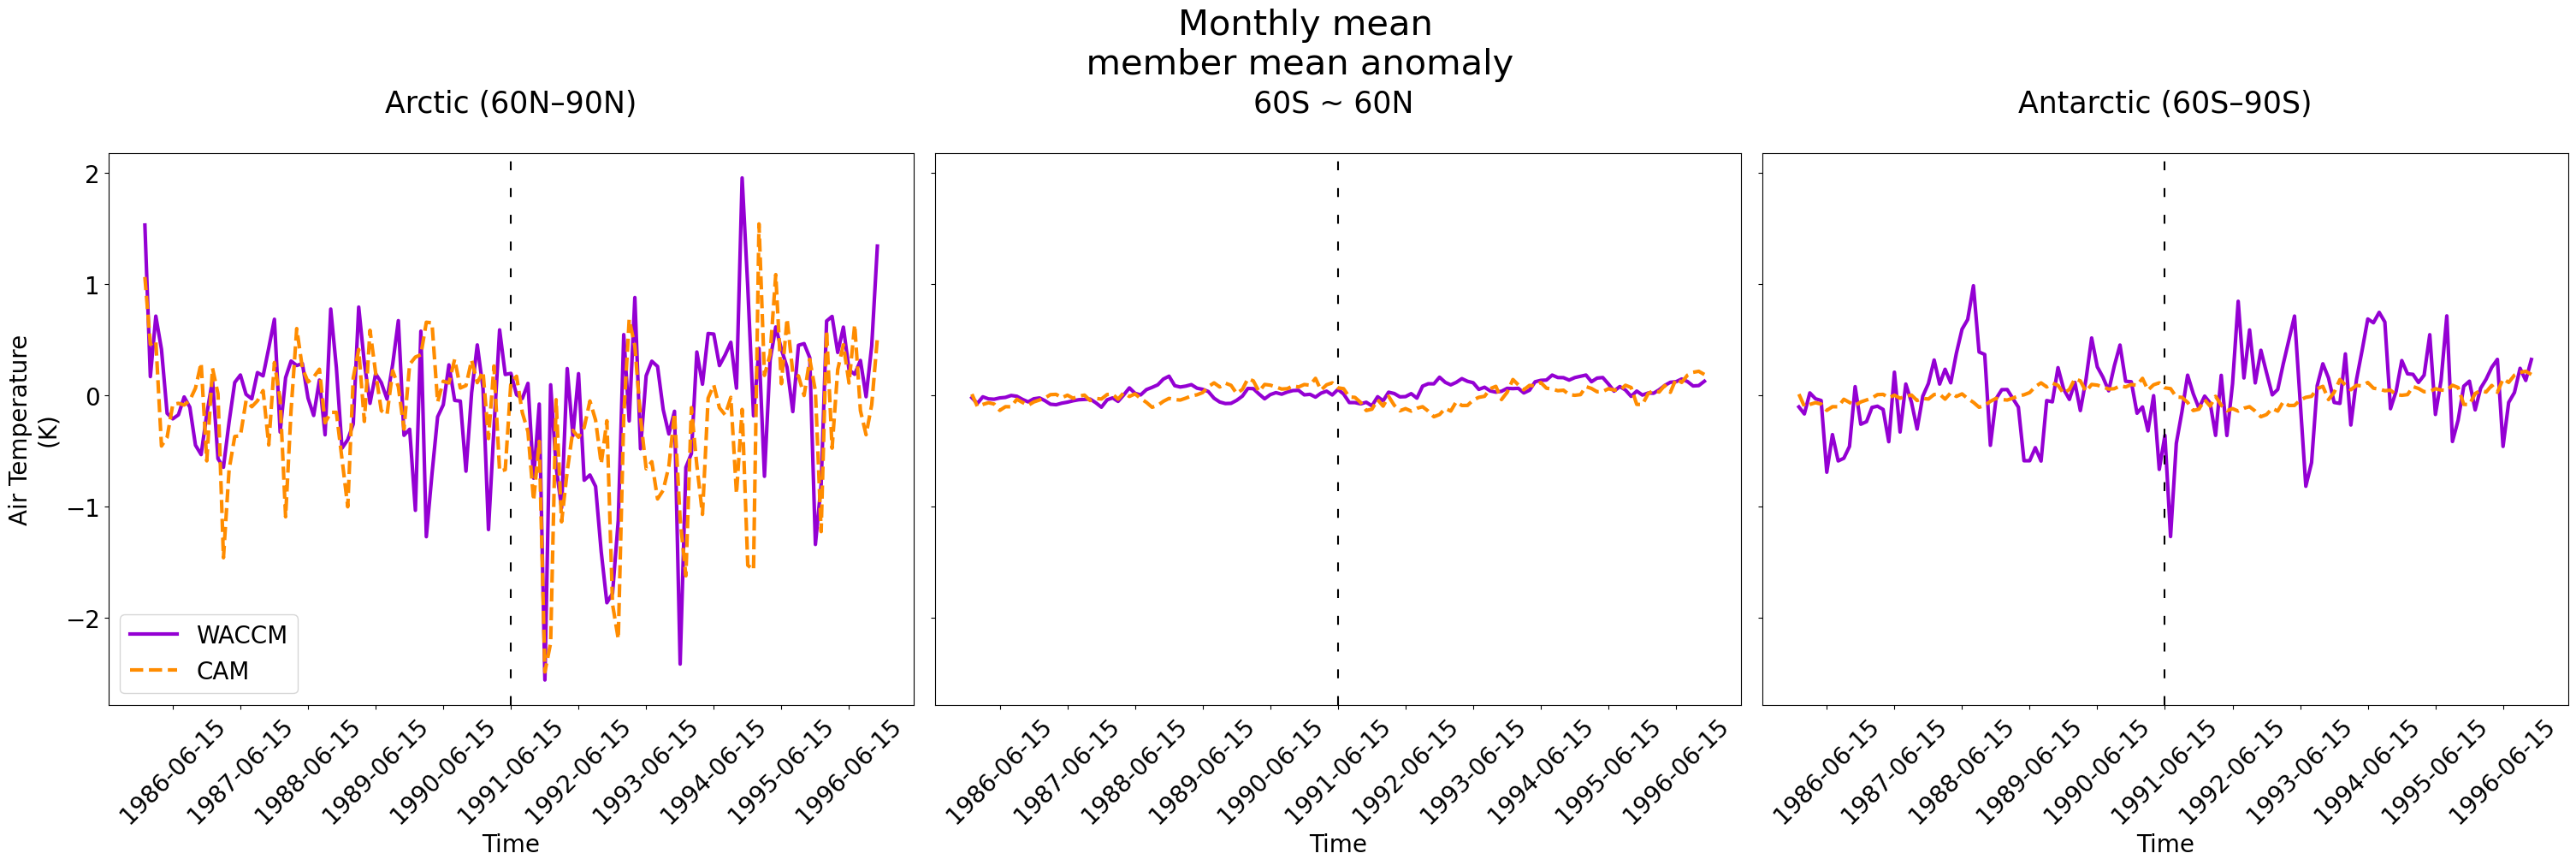

In [64]:
# average over the stratospheric region 100000 Pa to 92500 Pa
var = 'ta'
w1 = mon_waccm_arc[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)
w2 = mon_waccm_mid[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)
w3 = mon_waccm_ant[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)

c1 = mon_cam_arc[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)
c2 = mon_cam_mid[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)
c3 = mon_cam_ant[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)

plot3_month_mean(w1,w2,w3,c1,c2,c3,'\n  member mean anomaly',1991)

**Figure 5** <br>
Monthly member mean anomaly, averaged  over the pressure level 100000Pa to 92500 Pa, for temperature from January 1986 to December 1996 in the Arctic (> 60N), mid- and tropical region (60S > lat < 60N) and the Antarctic (lat < 60S). The dashed black line represents the eruption of Mount Pinatubo in 1991, June. The solid purple line represents the mean of the three WACCM runs and the dashed orange line represents the mean of the three CAM runs.

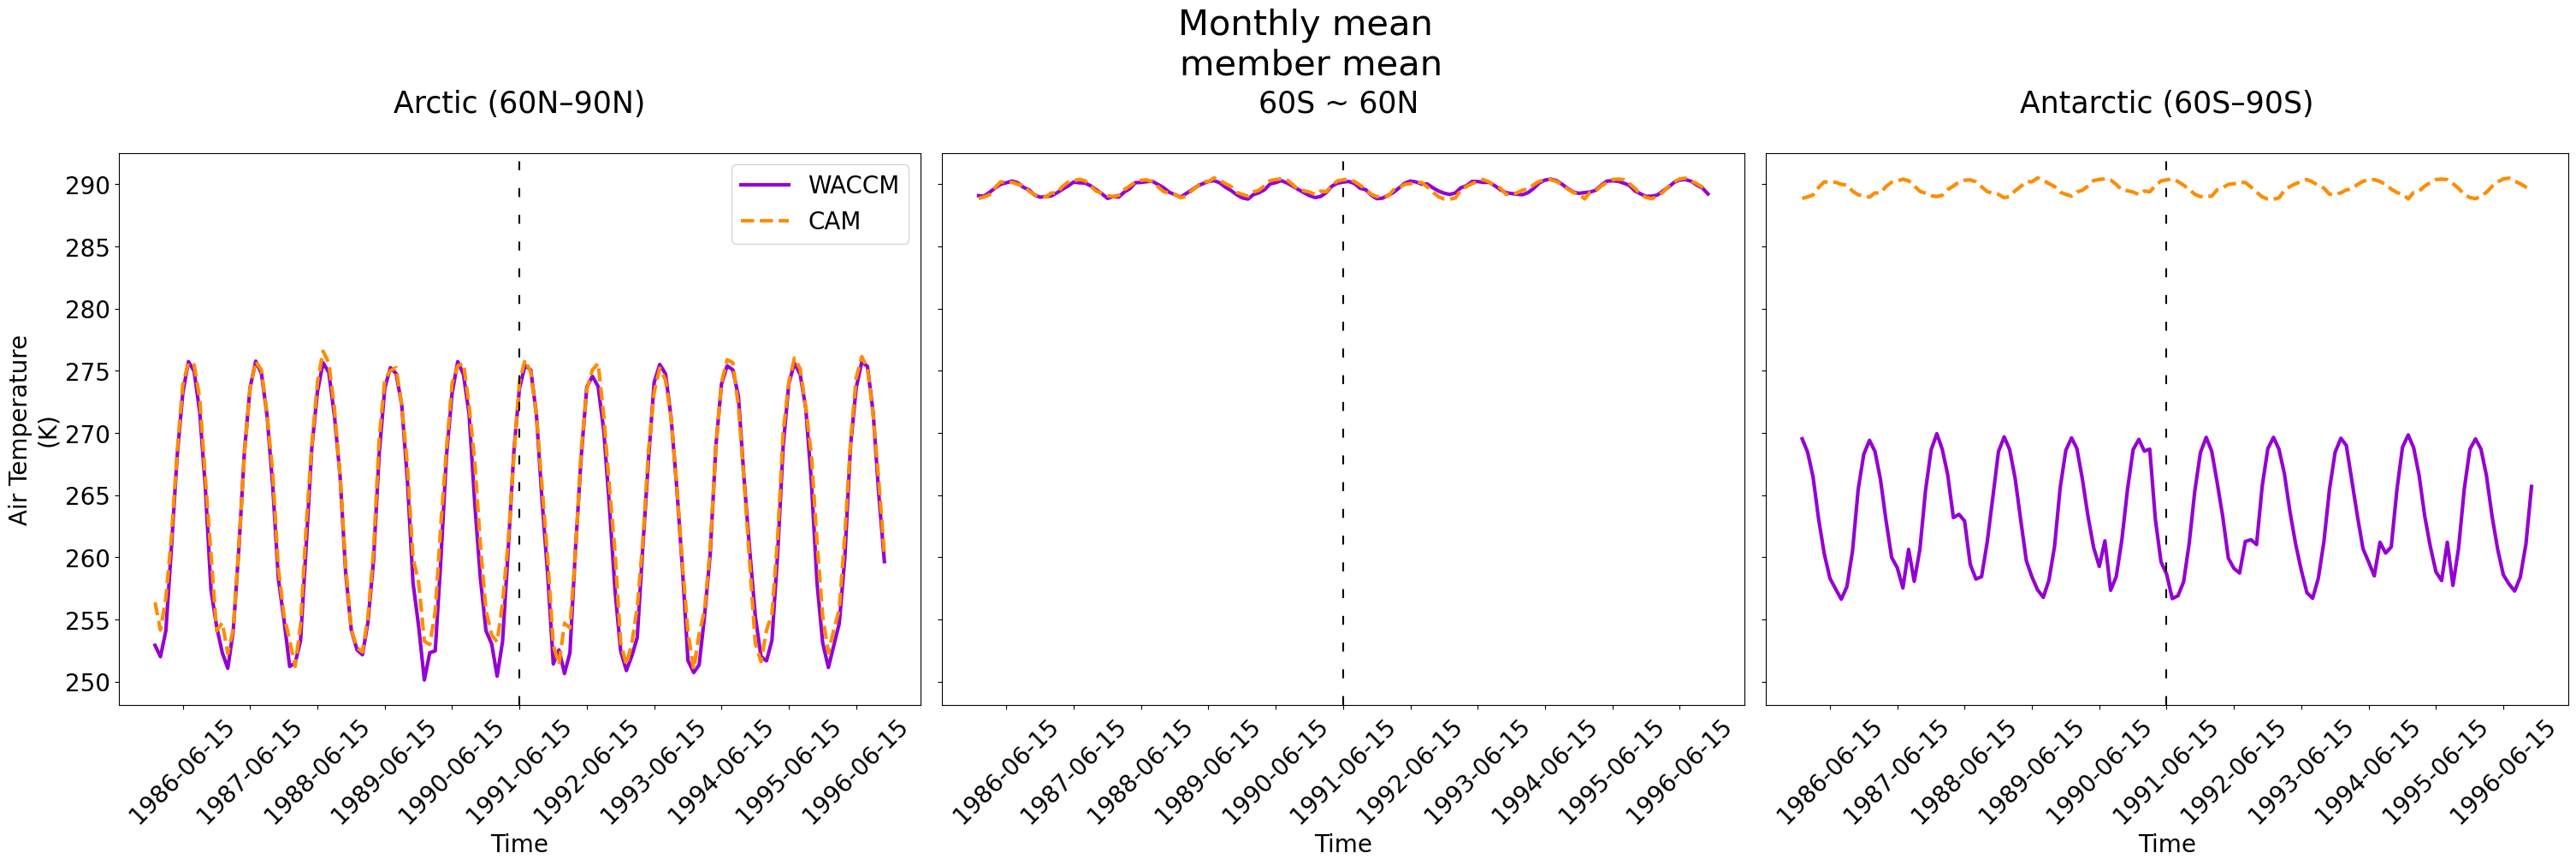

In [63]:
# average over the stratospheric region 100000 Pa to 92500 Pa
var = 'ta'
w1 = mon_w_arc_abs[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)
w2 = mon_w_mid_abs[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)
w3 = mon_w_ant_abs[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)

c1 = mon_c_arc_abs[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)
c2 = mon_c_mid_abs[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)
c3 = mon_c_ant_abs[var].sel(plev=slice(100000,92500)).mean(['plev','member_id'],keep_attrs=True)

plot3_month_mean(w1,w2,w3,c1,c2,c3,'\n    member mean',1991)

**Figure 6** <br>
Monthly member mean, averaged  over the pressure level 100000Pa to 92500 Pa, for temperature from January 1986 to December 1996 in the Arctic (> 60N), mid- and tropical region (60S > lat < 60N) and the Antarctic (lat < 60S). The dashed black line represents the eruption of Mount Pinatubo in 1991, June. The solid purple line represents the mean of the three WACCM runs and the dashed orange line represent the mean of the three CAM runs.

According to [A. Gettelman, et al. (2019)] ozone fluctuations together with increasing greenhouse gases affect the temperature trends.
Figure 1 to 4 have shown that ozone and AOD in WACCM seems to respond to volcaninc reactions whereas CAM does not, but by only looking at the Arctic region in figure 5, a temperature responce for the Mount Pinatubo eruption in June 1991 appears to be promising for CAM since CAM seems to follow WACCM. This is however not true for the Antarctic region in both figure 5 and figure 6, indicating that the air temperature for CAM is driven by another factor, not explored in this work. 

[A. Gettelman, et al. (2019)]:https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD030943

# Conclusions

From the figures presented in the result section it appears that the CAM simulations does not respond to the Mount Pinatubo eruption as expected. The column ozone for CAM in figure 1 and 2 does not seem to react at all after the eruption, wheras for WACCM there is a clear decrease of ozone the following years in all three regions after the eruption. The same conclusion can be drawn for the AOD, CAM does not responde to the Mount Pinatubo eruption, whereas WACCM does. The air temperature in WACCM seems to respond to the volcanic eruption in both the Arctic and Antarctic region but is less pronounced in the mid- and tropical region. This is also true for CAM, since CAM and WACCM seems to follow each other quite well, with the exception for the Antarctic region. 
Out of the two models and variables selected, the volcanic eruption is best represented in the WACCM model. This is due to WACCM having an interatctive stratospheric chemistry which calculates many of the variables based on input files, whereas CAM uses prescribed variables as input. 
For all three variables investigated, the Mount Pinatubo eruption in 1991 seems to affect the polar regions more than the mid- and tropical region. 
CAM will save computational power and is best suited for variables in the lower atmosphere region, whereas WACCM is capable of displaying responces of variables high up in the atmosphere.  



# References

*Danabasoglu et al., 2020* <br>
G. Danabasoglu, J.-F. Lamarque, J. Bacmeister, D.A. Bailey, A.K. DuVivier, J. Edwards, et al. <br>
**The Community Earth System Model version 2 (CESM2)** <br>
J. Adv. Model. Earth Syst., 12 (2) (2020), Article e2019MS001916, 10.1029/2019MS001916 <br>
DOI:  https://doi.org/10.1029/2019MS001916

*Dhomse et al., 2019* <br>
Dhomse, S.S., Feng, W., Montzka, S.A. et al. <br>
**Delay in recovery of the Antarctic ozone hole from unexpected CFC-11 emissions.** <br>
Nat Commun 10, 5781 (2019)<br>
DOI: https://doi.org/10.1038/s41467-019-13717-x

*Gettelman et al., 2019* <br>
A. Gettelman, M.J. Mills, D.E. Kinnison, R.R. Garcia, A.K. Smith, D.R. Marsh, S. Tilmes, F. Vitt, C.G. Bardeen, J. McInerny, H.-L. Liu, S.C. Solomon, L.M. Polvani, L.K. Emmons, J.-F. Lamarque, J.H. Richter, A.S. Glanville, J.T. Bacmeister, A.S. Phillips, R.B. Neale, I.R. Simpson, A.K. DuVivier, A. Hodzic, W.J. Randel <br>
**The whole atmosphere community climate model version 6 (WACCM6)** <br>
J. Geophys. Res. Atmos., 124 (23) (2019), pp. 12380-12403, 10.1029/2019JD030943
DOI: https://doi.org/10.1029/2019JD030943

*Langematz, 2019* <br>
Langematz, U. <br>
**Stratospheric ozone: down and up through the anthropocene.** <br>
ChemTexts 5, 8 (2019) <br>
DOI: https://doi.org/10.1007/s40828-019-0082-7

*Manzini, Elisa and Matthes, Katja  (2010)*<br>
Manzini, Elisa and Matthes, Katja  (2010) <br>
**Natural Variability of Stratospheric Ozone.** <br>
Open Access In: SPARC CCMVal, SPARC CCMVal Chemistry-Climate Model Validation. , ed. by Eyring, V., Shepherd, T. G. and Waugh, D. W.. SPARC Report, 5 (Chapter 8). <br>
SPARC International Project Office, Toronto, Canada, pp. 306-346. <br>
https://www.atmosp.physics.utoronto.ca/SPARC/ccmval_final/PDFs_CCMVal%20June%2015/ch8.pdf

# Acknowledgments

I would like to thank my group members, Zhihong Zhuo and Sigrid Marie Vildskog for the support and interesting conversations about the atmosphere and volcanoes. I would also like to thank Paul Zieger and Micheal Schulz for letting me attend the course.